In [18]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup

#Command to install OpenCage Geocoder for fetching Lat and Lng of Neighborhood
!pip install opencage

#Importing OpenCage Geocoder
from opencage.geocoder import OpenCageGeocode

# use the inline backend to generate the plots within the browser
%matplotlib inline 

#Importing Matplot lib and associated packages to perform Data Visualisation and Exploratory Data Analysis
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#!conda install=c conda-forge folium-0.5.0--yes
#Importing folium to visualise Maps and plot based on Lat and Lng
! pip install folium
import folium

#Importing KMeans from SciKit library to Classify neighborhoods into clusters
from sklearn.cluster import KMeans

print('Libraries imported')

Matplotlib version:  3.0.2
Libraries imported


In [19]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_200b85eed2d34da8900fa448f8ca6211 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='JksMRen8dUYXvXqWLVEsB8laWixzZjRFsGw-Uath5EgI',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_200b85eed2d34da8900fa448f8ca6211.get_object(Bucket='capstoneproject-donotdelete-pr-rqfzb9sgeyp2xg',Key='2019_Crime_Records.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

vnc_crime_df = pd.read_csv(body)

#Dropping unwanted columns
vnc_crime_df.drop(['MINUTE', 'HUNDRED_BLOCK', 'X', 'Y'], axis = 1, inplace = True)

vnc_crime_df.columns = ['Type', 'Year','Month','Day','Hour','Neighbourhood']
vnc_crime_df.head()

,Type,Year,Month,Day,Hour,Neighbourhood
0,Break and Enter Commercial,2019,3,7,2,Fairview
1,Break and Enter Commercial,2019,8,27,4,West End
2,Break and Enter Commercial,2019,6,9,10,West End
3,Break and Enter Commercial,2019,1,6,1,West End
4,Break and Enter Commercial,2019,7,21,11,Central Business District


## Creating a table with all the locations, crimes and their coordinates in a single space

In [20]:
# define the dataframe columns
column_names = ['Neighbourhood', 'Borough'] 

# instantiate the dataframe
vnc_neighbour = pd.DataFrame(columns=column_names)

vnc_neighbour['Neighbourhood'] = vnc_crime_df['Neighbourhood'].unique()

neighbour_dict = {'Central Business District':'Central', 'West End':'Central', 'Stanley Park':'Central', 'Victoria-Fraserview':'South Vancouver',
                  'Killarney':'South Vancouver', 'Musqueam':'South Vancouver', 'Mount Pleasant':'East Side', 'Strathcona':'East Side',
                  'Renfrew-Collingwood':'East Side', 'Grandview-Woodland':'East Side', 'Kensington-Cedar Cottage':'East Side', 'Hastings-Sunrise':'East Side',
                  'Sunset':'East Side', 'Riley Park':'East Side', 'Kitsilano':'West Side', 'Fairview':'West Side',
                  'Marpole':'West Side', 'Oakridge':'West Side', 'Dunbar-Southlands':'West Side', 'Kerrisdale':'West Side',
                  'Shaughnessy':'West Side', 'West Point Grey':'West Side', 'Arbutus Ridge':'West Side', 'South Cambie':'West Side'}

for row, neigh in zip(neighbour_dict, vnc_neighbour['Neighbourhood']):
  vnc_neighbour.loc[vnc_neighbour.Neighbourhood == row, 'Borough'] = neighbour_dict.get(row)

vnc_neighbour.dropna(inplace=True)
vnc_neighbour.head()

,Neighbourhood,Borough
0,Fairview,West Side
1,West End,Central
2,Central Business District,Central
3,Grandview-Woodland,East Side
4,Mount Pleasant,East Side


In [21]:
vnc_boroughs_crime = pd.merge(vnc_crime_df,vnc_neighbour, on='Neighbourhood')
vnc_boroughs_crime.dropna(inplace=True) #Data Cleaning
vnc_boroughs_crime.head()

,Type,Year,Month,Day,Hour,Neighbourhood,Borough
0,Break and Enter Commercial,2019,3,7,2,Fairview,West Side
1,Break and Enter Commercial,2019,4,21,16,Fairview,West Side
2,Break and Enter Commercial,2019,10,26,0,Fairview,West Side
3,Break and Enter Commercial,2019,3,27,8,Fairview,West Side
4,Break and Enter Commercial,2019,7,13,1,Fairview,West Side


## Count of the crimes in the different areas

In [22]:
vnc_crime_df['Neighbourhood'].value_counts()

Central Business District    10618
West End                      2864
Mount Pleasant                2219
Strathcona                    1928
Fairview                      1827
Grandview-Woodland            1613
Renfrew-Collingwood           1503
Kitsilano                     1426
Kensington-Cedar Cottage      1363
Hastings-Sunrise              1229
Sunset                         893
Riley Park                     828
Marpole                        771
Victoria-Fraserview            530
Killarney                      507
Oakridge                       491
Kerrisdale                     382
South Cambie                   367
Dunbar-Southlands              329
West Point Grey                323
Shaughnessy                    266
Arbutus Ridge                  263
Stanley Park                   167
Musqueam                        10
Name: Neighbourhood, dtype: int64

In [23]:
vnc_boroughs_crime['Borough'].value_counts()

Central            13649
East Side          11576
West Side           6445
South Vancouver     1047
Name: Borough, dtype: int64

## Crimes in Borough

In [24]:
vnc_crime_cat = pd.pivot_table(vnc_boroughs_crime,
                               values=['Year'],
                               index=['Borough'],
                               columns=['Type'],
                               aggfunc=len,
                               fill_value=0,
                               margins=True)
vnc_crime_cat

Year                                    \
Type            Break and Enter Commercial Break and Enter Residential/Other   
Borough                                                                        
Central                                774                               192   
East Side                              749                               881   
South Vancouver                         38                                81   
West Side                              403                               800   
All                                   1964                              1954   

                                                                          \
Type            Mischief Other Theft Theft from Vehicle Theft of Bicycle   
Borough                                                                    
Central             2003        2473               7041              696   
East Side           1966        1492               4707              712   
South Vancouver      178          82                512               33   
West Side            842         819               2559              541   
All                 4989        4866              14819             1982   

                                  \
Type            Theft of Vehicle   
Borough                            
Central                      251   
East Side                    651   
South Vancouver               64   
West Side                    234   
All                         1200   

                                                                        \
Type            Vehicle Collision or Pedestrian Struck (with Fatality)   
Borough                                                                  
Central                                                          1       
East Side                                                        6       
South Vancouver                                                  2       
West Side                                                        3       
All                                                             12       

                                                                             
Type            Vehicle Collision or Pedestrian Struck (with Injury)    All  
Borough                                                                      
Central                                                        218    13649  
East Side                                                      412    11576  
South Vancouver                                                 57     1047  
West Side                                                      244     6445  
All                                                            931    32717

In [25]:
vnc_crime_cat.reset_index(inplace = True)
vnc_crime_cat.columns = vnc_crime_cat.columns.map(''.join)
vnc_crime_cat.rename(columns={'YearAll':'Total'}, inplace=True)
# To ignore bottom All in Borough
vnc_crime_cat = vnc_crime_cat.head(4)
vnc_crime_cat

,Borough,YearBreak and Enter Commercial,YearBreak and Enter Residential/Other,YearMischief,YearOther Theft,YearTheft from Vehicle,YearTheft of Bicycle,YearTheft of Vehicle,YearVehicle Collision or Pedestrian Struck (with Fatality),YearVehicle Collision or Pedestrian Struck (with Injury),Total
0,Central,774,192,2003,2473,7041,696,251,1,218,13649
1,East Side,749,881,1966,1492,4707,712,651,6,412,11576
2,South Vancouver,38,81,178,82,512,33,64,2,57,1047
3,West Side,403,800,842,819,2559,541,234,3,244,6445


## Crimes in Neighborood

In [26]:
vnc_crime_neigh = pd.pivot_table(vnc_boroughs_crime,
                               values=['Year'],
                               index=['Neighbourhood'],
                               columns=['Type'],
                               aggfunc=len,
                               fill_value=0,
                               margins=True)
vnc_crime_neigh.head()

Year  \
Type                      Break and Enter Commercial   
Neighbourhood                                          
Arbutus Ridge                                      8   
Central Business District                        557   
Dunbar-Southlands                                 10   
Fairview                                         169   
Grandview-Woodland                               110   

                                                                      \
Type                      Break and Enter Residential/Other Mischief   
Neighbourhood                                                          
Arbutus Ridge                                            58       33   
Central Business District                               131     1579   
Dunbar-Southlands                                        51       47   
Fairview                                                 86      236   
Grandview-Woodland                                      131      317   

                                                                           \
Type                      Other Theft Theft from Vehicle Theft of Bicycle   
Neighbourhood                                                               
Arbutus Ridge                      24                 92               22   
Central Business District        1996               5507              524   
Dunbar-Southlands                  23                150               22   
Fairview                          281                763              210   
Grandview-Woodland                183                608              115   

                                            \
Type                      Theft of Vehicle   
Neighbourhood                                
Arbutus Ridge                           12   
Central Business District              158   
Dunbar-Southlands                       11   
Fairview                                43   
Grandview-Woodland                     108   

                                                                                  \
Type                      Vehicle Collision or Pedestrian Struck (with Fatality)   
Neighbourhood                                                                      
Arbutus Ridge                                                              0       
Central Business District                                                  1       
Dunbar-Southlands                                                          0       
Fairview                                                                   0       
Grandview-Woodland                                                         1       

                                                                                \
Type                      Vehicle Collision or Pedestrian Struck (with Injury)   
Neighbourhood                                                                    
Arbutus Ridge                                                             14     
Central Business District                                                165     
Dunbar-Southlands                                                         15     
Fairview                                                                  39     
Grandview-Woodland                                                        40     

                                  
Type                         All  
Neighbourhood                     
Arbutus Ridge                263  
Central Business District  10618  
Dunbar-Southlands            329  
Fairview                    1827  
Grandview-Woodland          1613

In [27]:
vnc_crime_neigh.reset_index(inplace = True)
vnc_crime_neigh.columns = vnc_crime_neigh.columns.map(''.join)
vnc_crime_neigh.rename(columns={'YearAll':'Total'}, inplace=True)

vnc_crime_neigh.head()

,Neighbourhood,YearBreak and Enter Commercial,YearBreak and Enter Residential/Other,YearMischief,YearOther Theft,YearTheft from Vehicle,YearTheft of Bicycle,YearTheft of Vehicle,YearVehicle Collision or Pedestrian Struck (with Fatality),YearVehicle Collision or Pedestrian Struck (with Injury),Total
0,Arbutus Ridge,8,58,33,24,92,22,12,0,14,263
1,Central Business District,557,131,1579,1996,5507,524,158,1,165,10618
2,Dunbar-Southlands,10,51,47,23,150,22,11,0,15,329
3,Fairview,169,86,236,281,763,210,43,0,39,1827
4,Grandview-Woodland,110,131,317,183,608,115,108,1,40,1613


## Top 5 areas with top number of crimes

In [28]:
vnc_crime_neigh.sort_values(['Total'], ascending = False, axis = 0, inplace = True )

crime_neigh_top5 = vnc_crime_neigh.iloc[1:6]
crime_neigh_top5

,Neighbourhood,YearBreak and Enter Commercial,YearBreak and Enter Residential/Other,YearMischief,YearOther Theft,YearTheft from Vehicle,YearTheft of Bicycle,YearTheft of Vehicle,YearVehicle Collision or Pedestrian Struck (with Fatality),YearVehicle Collision or Pedestrian Struck (with Injury),Total
1,Central Business District,557,131,1579,1996,5507,524,158,1,165,10618
22,West End,208,58,403,472,1428,159,90,0,46,2864
11,Mount Pleasant,200,121,286,467,769,217,103,0,56,2219
19,Strathcona,180,118,464,119,789,106,89,1,62,1928
3,Fairview,169,86,236,281,763,210,43,0,39,1827


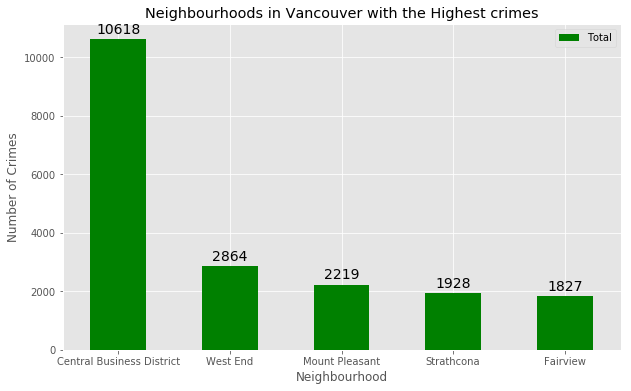

In [29]:
per_neigh = crime_neigh_top5[['Neighbourhood','Total']]

per_neigh.set_index('Neighbourhood',inplace = True)

ax = per_neigh.plot(kind='bar', figsize=(10, 6), color = 'green', rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Neighbourhood')
ax.set_title('Neighbourhoods in Vancouver with the Highest crimes')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )

plt.show()

In [30]:
vnc_crime_cat = pd.pivot_table(vnc_boroughs_crime,
                               values=['Year'],
                               index=['Borough'],
                               columns=['Type'],
                               aggfunc=len,
                               fill_value=0,
                               margins=True)
vnc_crime_cat

Year                                    \
Type            Break and Enter Commercial Break and Enter Residential/Other   
Borough                                                                        
Central                                774                               192   
East Side                              749                               881   
South Vancouver                         38                                81   
West Side                              403                               800   
All                                   1964                              1954   

                                                                          \
Type            Mischief Other Theft Theft from Vehicle Theft of Bicycle   
Borough                                                                    
Central             2003        2473               7041              696   
East Side           1966        1492               4707              712   
South Vancouver      178          82                512               33   
West Side            842         819               2559              541   
All                 4989        4866              14819             1982   

                                  \
Type            Theft of Vehicle   
Borough                            
Central                      251   
East Side                    651   
South Vancouver               64   
West Side                    234   
All                         1200   

                                                                        \
Type            Vehicle Collision or Pedestrian Struck (with Fatality)   
Borough                                                                  
Central                                                          1       
East Side                                                        6       
South Vancouver                                                  2       
West Side                                                        3       
All                                                             12       

                                                                             
Type            Vehicle Collision or Pedestrian Struck (with Injury)    All  
Borough                                                                      
Central                                                        218    13649  
East Side                                                      412    11576  
South Vancouver                                                 57     1047  
West Side                                                      244     6445  
All                                                            931    32717

In [31]:
vnc_crime_cat.reset_index(inplace = True)
vnc_crime_cat.columns = vnc_crime_cat.columns.map(''.join)
vnc_crime_cat.rename(columns={'YearAll':'Total',
                              'YearBreak and Enter Commercial' : 'Break and Enter Commercial',
                              'YearBreak and Enter Residential/Other' : 'Break and Enter Residential',
                              'YearMischief' : 'Mischief',
                              'YearOther Theft' : 'Other',
                              'YearTheft from Vehicle' : 'Theft from Vehicle',
                              'YearTheft of Bicycle' : 'Theft of Bicycle',
                              'YearTheft of Vehicle' : 'Theft of Vehicle',
                              'YearVehicle Collision or Pedestrian Struck (with Fatality)' : 'Vehicle Collision or Pedestrian Struck (with Fatality)',
                              'YearVehicle Collision or Pedestrian Struck (with Injury)' : 'Vehicle Collision or Pedestrian Struck (with Injury)'}, inplace=True)
# To ignore bottom All in Borough
vnc_crime_cat = vnc_crime_cat.head(4)
vnc_crime_cat

,Borough,Break and Enter Commercial,Break and Enter Residential,Mischief,Other,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),Total
0,Central,774,192,2003,2473,7041,696,251,1,218,13649
1,East Side,749,881,1966,1492,4707,712,651,6,412,11576
2,South Vancouver,38,81,178,82,512,33,64,2,57,1047
3,West Side,403,800,842,819,2559,541,234,3,244,6445


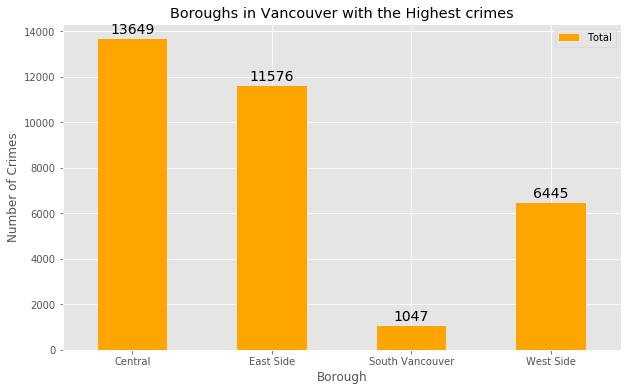

In [32]:
per_borough = vnc_crime_cat[['Borough','Total']]

per_borough.set_index('Borough',inplace = True)

ax = per_borough.plot(kind='bar', figsize=(10, 6), color = 'orange', rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Borough')
ax.set_title('Boroughs in Vancouver with the Highest crimes')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )

plt.show()

<h1>Example of Crime frequency in a a particular borough (Central)</h1>

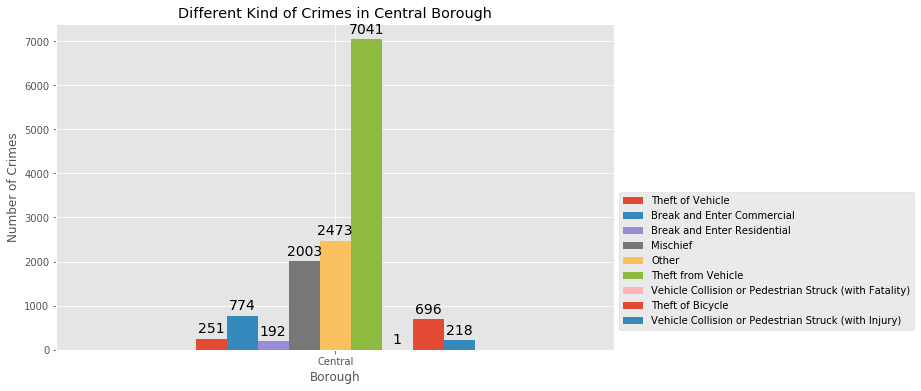

In [33]:
vnc_CN_df = vnc_crime_cat[vnc_crime_cat['Borough'] == 'Central']

vnc_CN_df = vnc_CN_df.sort_values(['Total'], ascending = True, axis = 0)

vnc_CN = vnc_CN_df[['Borough','Theft of Vehicle', 'Break and Enter Commercial','Break and Enter Residential','Mischief','Other',
                 'Theft from Vehicle','Vehicle Collision or Pedestrian Struck (with Fatality)','Theft of Bicycle',
                 'Vehicle Collision or Pedestrian Struck (with Injury)']]


vnc_CN.set_index('Borough',inplace = True)

ax = vnc_CN.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Borough')
ax.set_title('Different Kind of Crimes in Central Borough')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=3), 
                (p.get_x()+p.get_width()/3., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(5, 10), 
                textcoords='offset points',
                fontsize = 14
               )
    ax.legend(loc='upper left', bbox_to_anchor=(1.00, 0.5))

plt.show()

Creating a new consolidated dataset of the Neighborhoods, along with their boroughs, crime data and the respective Neighbourhood's co-ordinates.:
This data will be fetched using OpenCage Geocoder to find the safest borough and explore the neighbourhood by plotting it on maps using Folium and perform exploratory data analysis.

In [34]:
vnc_boroughs_crime['Neighbourhood'].unique()

array(['Fairview', 'West End', 'Central Business District',
       'Grandview-Woodland', 'Mount Pleasant', 'Strathcona', 'Sunset',
       'Kensington-Cedar Cottage', 'Stanley Park', 'Shaughnessy',
       'Marpole', 'Victoria-Fraserview', 'Kerrisdale', 'Kitsilano',
       'Hastings-Sunrise', 'Riley Park', 'Oakridge', 'West Point Grey',
       'Arbutus Ridge', 'Renfrew-Collingwood', 'Killarney',
       'South Cambie', 'Dunbar-Southlands', 'Musqueam'], dtype=object)

## Getting all the coordinates

In [35]:
Latitude = []
Longitude = []
Borough = []
Neighbourhood = vnc_boroughs_crime['Neighbourhood'].unique()
key= 'ae389a8e7afb4d64b107f88ed1f049a9'
# Key has been hidden
geocoder = OpenCageGeocode(key)

for i in range(len(Neighbourhood)):
    address = '{}, Vancouver, BC, Canada'.format(Neighbourhood[i])
    location = geocoder.geocode(address)
    Latitude.append(location[0]['geometry']['lat'])
    Longitude.append(location[0]['geometry']['lng'])
    Borough.append('Borough')
print(Latitude, Longitude)

[49.2641128, 49.2841308, 49.24966, 49.2705588, 49.2633296, 49.279554, 49.2195929, 49.2476321, 49.3019112, 49.2518626, 49.2092233, 49.2184156, 49.2346728, 49.2694099, 49.2775935, 49.2474381, 49.2308288, 49.2644843, 49.2409677, 49.2420242, 49.2242738, 49.2466847, 49.2534601, 49.2346005] [-123.1268352, -123.1317949, -123.11934, -123.0679417, -123.0965885, -123.0899788, -123.0902386, -123.0842067, -123.1415405, -123.1380226, -123.1361495, -123.0732871, -123.1553893, -123.155267, -123.0439199, -123.1029664, -123.1311342, -123.1854326, -123.1670008, -123.0576794, -123.0462504, -123.120915, -123.1850439, -123.183397]


In [36]:
CN_neig_dict = {'Neighbourhood': Neighbourhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
CN_neig_geo = pd.DataFrame(data=CN_neig_dict, columns=['Neighbourhood', 'Borough', 'Latitude', 'Longitude'], index=None)

CN_neig_geo.drop(['Borough'], 1, inplace = True)

In [37]:
# Getting the coordinates of Vancouver
address = 'Vancouver, BC, Canada'

location = geocoder.geocode(address)
latitude = location[0]['geometry']['lat']
longitude = location[0]['geometry']['lng']

print('The geographical coordinate of Vancouver, Canada are {}, {}.'.format(latitude, longitude))

The geographical coordinate of Vancouver, Canada are 49.2608724, -123.1139529.


## All the areas with the coordinates

In [38]:
CN_neig_geo

,Neighbourhood,Latitude,Longitude
0,Fairview,49.264113,-123.126835
1,West End,49.284131,-123.131795
2,Central Business District,49.249660,-123.119340
3,Grandview-Woodland,49.270559,-123.067942
4,Mount Pleasant,49.263330,-123.096588
5,Strathcona,49.279554,-123.089979
6,Sunset,49.219593,-123.090239
7,Kensington-Cedar Cottage,49.247632,-123.084207
8,Stanley Park,49.301911,-123.141541
9,Shaughnessy,49.251863,-123.138023


In [39]:
vnc_boroughs_crime.reset_index(inplace = True)
vnc_boroughs_crime.head()

,index,Type,Year,Month,Day,Hour,Neighbourhood,Borough
0,0,Break and Enter Commercial,2019,3,7,2,Fairview,West Side
1,1,Break and Enter Commercial,2019,4,21,16,Fairview,West Side
2,2,Break and Enter Commercial,2019,10,26,0,Fairview,West Side
3,3,Break and Enter Commercial,2019,3,27,8,Fairview,West Side
4,4,Break and Enter Commercial,2019,7,13,1,Fairview,West Side


In [40]:
NBD = pd.merge(vnc_boroughs_crime, CN_neig_geo, on='Neighbourhood')

In [41]:
NBD

,index,Type,Year,Month,Day,Hour,Neighbourhood,Borough,Latitude,Longitude
0,0,Break and Enter Commercial,2019,3,7,2,Fairview,West Side,49.264113,-123.126835
1,1,Break and Enter Commercial,2019,4,21,16,Fairview,West Side,49.264113,-123.126835
2,2,Break and Enter Commercial,2019,10,26,0,Fairview,West Side,49.264113,-123.126835
3,3,Break and Enter Commercial,2019,3,27,8,Fairview,West Side,49.264113,-123.126835
4,4,Break and Enter Commercial,2019,7,13,1,Fairview,West Side,49.264113,-123.126835
5,5,Break and Enter Commercial,2019,4,18,8,Fairview,West Side,49.264113,-123.126835
6,6,Break and Enter Commercial,2019,4,14,5,Fairview,West Side,49.264113,-123.126835
7,7,Break and Enter Commercial,2019,9,10,20,Fairview,West Side,49.264113,-123.126835
8,8,Break and Enter Commercial,2019,10,10,0,Fairview,West Side,49.264113,-123.126835
9,9,Break and Enter Commercial,2019,1,16,3,Fairview,West Side,49.264113,-123.126835


In [42]:
# one hot encoding
NBD_onehot = pd.get_dummies(NBD[['Type']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
NBD_onehot['Neighbourhood'] = NBD['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [NBD_onehot.columns[-1]] + list(NBD_onehot.columns[:-1])
NBD_onehot = NBD_onehot[fixed_columns]

NBD_onehot.head()

,Neighbourhood,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury)
0,Fairview,1,0,0,0,0,0,0,0,0
1,Fairview,1,0,0,0,0,0,0,0,0
2,Fairview,1,0,0,0,0,0,0,0,0
3,Fairview,1,0,0,0,0,0,0,0,0
4,Fairview,1,0,0,0,0,0,0,0,0


In [43]:
NBD_onehot.shape

(32717, 10)

In [44]:
NBD_onehot_grouped = NBD_onehot.groupby('Neighbourhood').mean().reset_index()
NBD_onehot_grouped.head()

,Neighbourhood,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury)
0,Arbutus Ridge,0.030418,0.220532,0.125475,0.091255,0.349810,0.083650,0.045627,0.000000,0.053232
1,Central Business District,0.052458,0.012338,0.148710,0.187983,0.518648,0.049350,0.014880,0.000094,0.015540
2,Dunbar-Southlands,0.030395,0.155015,0.142857,0.069909,0.455927,0.066869,0.033435,0.000000,0.045593
3,Fairview,0.092501,0.047072,0.129174,0.153804,0.417625,0.114943,0.023536,0.000000,0.021346
4,Grandview-Woodland,0.068196,0.081215,0.196528,0.113453,0.376937,0.071296,0.066956,0.000620,0.024799


In [45]:
#Top 5 crimes
num_top_venues = 5

for hood in NBD_onehot_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = NBD_onehot_grouped[NBD_onehot_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['Type','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arbutus Ridge----
                                Type  freq
0                 Theft from Vehicle  0.35
1  Break and Enter Residential/Other  0.22
2                           Mischief  0.13
3                        Other Theft  0.09
4                   Theft of Bicycle  0.08


----Central Business District----
                         Type  freq
0          Theft from Vehicle  0.52
1                 Other Theft  0.19
2                    Mischief  0.15
3  Break and Enter Commercial  0.05
4            Theft of Bicycle  0.05


----Dunbar-Southlands----
                                Type  freq
0                 Theft from Vehicle  0.46
1  Break and Enter Residential/Other  0.16
2                           Mischief  0.14
3                        Other Theft  0.07
4                   Theft of Bicycle  0.07


----Fairview----
                         Type  freq
0          Theft from Vehicle  0.42
1                 Other Theft  0.15
2                    Mischief  0.13
3            Theft 

Create the new dataframe and display the top 10 Crimes for each neighborhood.

In [46]:
num_top_crimes = 10

# create columns according to number of top crimes
columns = ['Neighbourhood']
for ind in np.arange(num_top_crimes):
    columns.append('No.{} Most Common Crime'.format(ind))

# create a new dataframe
neighborhoods_crimes_sorted = pd.DataFrame(columns=columns)
neighborhoods_crimes_sorted['Neighbourhood'] = NBD_onehot_grouped['Neighbourhood']
neighborhoods_crimes_sorted.shape

(24, 11)

In [47]:
np.arange(NBD_onehot_grouped.shape[0])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [48]:
def return_most_common_crimes(row, num_top_crimes):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_crimes]

In [49]:
for ind in np.arange(NBD_onehot_grouped.shape[0]):
    neighborhoods_crimes_sorted.iloc[ind, 2:] = return_most_common_crimes(NBD_onehot_grouped.iloc[ind, :], num_top_crimes)

neighborhoods_crimes_sorted.drop('No.0 Most Common Crime', axis=1, inplace=True)

In [50]:
neighborhoods_crimes_sorted.head()

,Neighbourhood,No.1 Most Common Crime,No.2 Most Common Crime,No.3 Most Common Crime,No.4 Most Common Crime,No.5 Most Common Crime,No.6 Most Common Crime,No.7 Most Common Crime,No.8 Most Common Crime,No.9 Most Common Crime
0,Arbutus Ridge,Theft from Vehicle,Break and Enter Residential/Other,Mischief,Other Theft,Theft of Bicycle,Vehicle Collision or Pedestrian Struck (with I...,Theft of Vehicle,Break and Enter Commercial,Vehicle Collision or Pedestrian Struck (with F...
1,Central Business District,Theft from Vehicle,Other Theft,Mischief,Break and Enter Commercial,Theft of Bicycle,Vehicle Collision or Pedestrian Struck (with I...,Theft of Vehicle,Break and Enter Residential/Other,Vehicle Collision or Pedestrian Struck (with F...
2,Dunbar-Southlands,Theft from Vehicle,Break and Enter Residential/Other,Mischief,Other Theft,Theft of Bicycle,Vehicle Collision or Pedestrian Struck (with I...,Theft of Vehicle,Break and Enter Commercial,Vehicle Collision or Pedestrian Struck (with F...
3,Fairview,Theft from Vehicle,Other Theft,Mischief,Theft of Bicycle,Break and Enter Commercial,Break and Enter Residential/Other,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with I...,Vehicle Collision or Pedestrian Struck (with F...
4,Grandview-Woodland,Theft from Vehicle,Mischief,Other Theft,Break and Enter Residential/Other,Theft of Bicycle,Break and Enter Commercial,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with I...,Vehicle Collision or Pedestrian Struck (with F...


In [51]:
# set number of clusters
kclusters = 5

NBC_grouped_clustering = NBD_onehot_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(NBC_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 0, 1, 3, 3, 1, 1, 2, 1, 3], dtype=int32)

In [52]:
# add clustering labels
neighborhoods_crimes_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

vancouver_merged = CN_neig_geo

# merge toronto_grouped with Vancouver data to add latitude/longitude for each neighborhood
vancouver_merged = vancouver_merged.join(neighborhoods_crimes_sorted.set_index('Neighbourhood'), on='Neighbourhood')

vancouver_merged.head()

,Neighbourhood,Latitude,Longitude,Cluster Labels,No.1 Most Common Crime,No.2 Most Common Crime,No.3 Most Common Crime,No.4 Most Common Crime,No.5 Most Common Crime,No.6 Most Common Crime,No.7 Most Common Crime,No.8 Most Common Crime,No.9 Most Common Crime
0,Fairview,49.264113,-123.126835,3,Theft from Vehicle,Other Theft,Mischief,Theft of Bicycle,Break and Enter Commercial,Break and Enter Residential/Other,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with I...,Vehicle Collision or Pedestrian Struck (with F...
1,West End,49.284131,-123.131795,0,Theft from Vehicle,Other Theft,Mischief,Break and Enter Commercial,Theft of Bicycle,Theft of Vehicle,Break and Enter Residential/Other,Vehicle Collision or Pedestrian Struck (with I...,Vehicle Collision or Pedestrian Struck (with F...
2,Central Business District,49.249660,-123.119340,0,Theft from Vehicle,Other Theft,Mischief,Break and Enter Commercial,Theft of Bicycle,Vehicle Collision or Pedestrian Struck (with I...,Theft of Vehicle,Break and Enter Residential/Other,Vehicle Collision or Pedestrian Struck (with F...
3,Grandview-Woodland,49.270559,-123.067942,3,Theft from Vehicle,Mischief,Other Theft,Break and Enter Residential/Other,Theft of Bicycle,Break and Enter Commercial,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with I...,Vehicle Collision or Pedestrian Struck (with F...
4,Mount Pleasant,49.263330,-123.096588,3,Theft from Vehicle,Other Theft,Mischief,Theft of Bicycle,Break and Enter Commercial,Break and Enter Residential/Other,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with I...,Vehicle Collision or Pedestrian Struck (with F...


In [53]:
latitude, longitude

(49.2608724, -123.1139529)

In [54]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(vancouver_merged['Latitude'], vancouver_merged['Longitude'], vancouver_merged['Neighbourhood'], vancouver_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<b>Analysis of each cluster</b>

Cluster 1

In [55]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 0, vancouver_merged.columns[[0] + list(range(4, vancouver_merged.shape[1]))]]

,Neighbourhood,No.1 Most Common Crime,No.2 Most Common Crime,No.3 Most Common Crime,No.4 Most Common Crime,No.5 Most Common Crime,No.6 Most Common Crime,No.7 Most Common Crime,No.8 Most Common Crime,No.9 Most Common Crime
1,West End,Theft from Vehicle,Other Theft,Mischief,Break and Enter Commercial,Theft of Bicycle,Theft of Vehicle,Break and Enter Residential/Other,Vehicle Collision or Pedestrian Struck (with I...,Vehicle Collision or Pedestrian Struck (with F...
2,Central Business District,Theft from Vehicle,Other Theft,Mischief,Break and Enter Commercial,Theft of Bicycle,Vehicle Collision or Pedestrian Struck (with I...,Theft of Vehicle,Break and Enter Residential/Other,Vehicle Collision or Pedestrian Struck (with F...
8,Stanley Park,Theft from Vehicle,Mischief,Theft of Bicycle,Break and Enter Commercial,Vehicle Collision or Pedestrian Struck (with I...,Other Theft,Theft of Vehicle,Break and Enter Residential/Other,Vehicle Collision or Pedestrian Struck (with F...


Cluster 2

In [56]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 1, vancouver_merged.columns[[0] + list(range(4, vancouver_merged.shape[1]))]]

,Neighbourhood,No.1 Most Common Crime,No.2 Most Common Crime,No.3 Most Common Crime,No.4 Most Common Crime,No.5 Most Common Crime,No.6 Most Common Crime,No.7 Most Common Crime,No.8 Most Common Crime,No.9 Most Common Crime
5,Strathcona,Theft from Vehicle,Mischief,Break and Enter Commercial,Other Theft,Break and Enter Residential/Other,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with I...,Vehicle Collision or Pedestrian Struck (with F...
7,Kensington-Cedar Cottage,Theft from Vehicle,Mischief,Other Theft,Break and Enter Residential/Other,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with I...,Break and Enter Commercial,Vehicle Collision or Pedestrian Struck (with F...
11,Victoria-Fraserview,Theft from Vehicle,Mischief,Break and Enter Residential/Other,Other Theft,Vehicle Collision or Pedestrian Struck (with I...,Theft of Vehicle,Theft of Bicycle,Break and Enter Commercial,Vehicle Collision or Pedestrian Struck (with F...
14,Hastings-Sunrise,Theft from Vehicle,Mischief,Break and Enter Residential/Other,Theft of Vehicle,Other Theft,Theft of Bicycle,Vehicle Collision or Pedestrian Struck (with I...,Break and Enter Commercial,Vehicle Collision or Pedestrian Struck (with F...
15,Riley Park,Theft from Vehicle,Break and Enter Residential/Other,Mischief,Other Theft,Theft of Bicycle,Theft of Vehicle,Break and Enter Commercial,Vehicle Collision or Pedestrian Struck (with I...,Vehicle Collision or Pedestrian Struck (with F...
17,West Point Grey,Theft from Vehicle,Mischief,Break and Enter Residential/Other,Theft of Bicycle,Theft of Vehicle,Other Theft,Vehicle Collision or Pedestrian Struck (with I...,Break and Enter Commercial,Vehicle Collision or Pedestrian Struck (with F...
20,Killarney,Theft from Vehicle,Mischief,Other Theft,Break and Enter Residential/Other,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with I...,Break and Enter Commercial,Theft of Bicycle,Vehicle Collision or Pedestrian Struck (with F...
22,Dunbar-Southlands,Theft from Vehicle,Break and Enter Residential/Other,Mischief,Other Theft,Theft of Bicycle,Vehicle Collision or Pedestrian Struck (with I...,Theft of Vehicle,Break and Enter Commercial,Vehicle Collision or Pedestrian Struck (with F...


In [57]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 3, vancouver_merged.columns[[0] + list(range(4, vancouver_merged.shape[1]))]]['Neighbourhood'].tolist()

['Fairview',
 'Grandview-Woodland',
 'Mount Pleasant',
 'Sunset',
 'Marpole',
 'Kitsilano',
 'Oakridge',
 'Renfrew-Collingwood',
 'South Cambie']

Cluster 3

In [58]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] ==2, vancouver_merged.columns[[0] + list(range(4, vancouver_merged.shape[1]))]]

,Neighbourhood,No.1 Most Common Crime,No.2 Most Common Crime,No.3 Most Common Crime,No.4 Most Common Crime,No.5 Most Common Crime,No.6 Most Common Crime,No.7 Most Common Crime,No.8 Most Common Crime,No.9 Most Common Crime
9,Shaughnessy,Theft from Vehicle,Break and Enter Residential/Other,Mischief,Vehicle Collision or Pedestrian Struck (with I...,Break and Enter Commercial,Theft of Bicycle,Theft of Vehicle,Other Theft,Vehicle Collision or Pedestrian Struck (with F...
12,Kerrisdale,Theft from Vehicle,Break and Enter Residential/Other,Mischief,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with I...,Break and Enter Commercial,Theft of Bicycle,Other Theft,Vehicle Collision or Pedestrian Struck (with F...
18,Arbutus Ridge,Theft from Vehicle,Break and Enter Residential/Other,Mischief,Other Theft,Theft of Bicycle,Vehicle Collision or Pedestrian Struck (with I...,Theft of Vehicle,Break and Enter Commercial,Vehicle Collision or Pedestrian Struck (with F...


Cluster 4

In [59]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 3, vancouver_merged.columns[[0] + list(range(4, vancouver_merged.shape[1]))]]

,Neighbourhood,No.1 Most Common Crime,No.2 Most Common Crime,No.3 Most Common Crime,No.4 Most Common Crime,No.5 Most Common Crime,No.6 Most Common Crime,No.7 Most Common Crime,No.8 Most Common Crime,No.9 Most Common Crime
0,Fairview,Theft from Vehicle,Other Theft,Mischief,Theft of Bicycle,Break and Enter Commercial,Break and Enter Residential/Other,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with I...,Vehicle Collision or Pedestrian Struck (with F...
3,Grandview-Woodland,Theft from Vehicle,Mischief,Other Theft,Break and Enter Residential/Other,Theft of Bicycle,Break and Enter Commercial,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with I...,Vehicle Collision or Pedestrian Struck (with F...
4,Mount Pleasant,Theft from Vehicle,Other Theft,Mischief,Theft of Bicycle,Break and Enter Commercial,Break and Enter Residential/Other,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with I...,Vehicle Collision or Pedestrian Struck (with F...
6,Sunset,Theft from Vehicle,Other Theft,Mischief,Break and Enter Commercial,Vehicle Collision or Pedestrian Struck (with I...,Theft of Vehicle,Break and Enter Residential/Other,Theft of Bicycle,Vehicle Collision or Pedestrian Struck (with F...
10,Marpole,Theft from Vehicle,Other Theft,Break and Enter Residential/Other,Mischief,Break and Enter Commercial,Vehicle Collision or Pedestrian Struck (with I...,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with F...
13,Kitsilano,Theft from Vehicle,Mischief,Other Theft,Theft of Bicycle,Break and Enter Residential/Other,Break and Enter Commercial,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with I...,Vehicle Collision or Pedestrian Struck (with F...
16,Oakridge,Theft from Vehicle,Break and Enter Residential/Other,Other Theft,Mischief,Theft of Bicycle,Theft of Vehicle,Break and Enter Commercial,Vehicle Collision or Pedestrian Struck (with I...,Vehicle Collision or Pedestrian Struck (with F...
19,Renfrew-Collingwood,Theft from Vehicle,Other Theft,Mischief,Break and Enter Residential/Other,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with I...,Break and Enter Commercial,Theft of Bicycle,Vehicle Collision or Pedestrian Struck (with F...
21,South Cambie,Theft from Vehicle,Other Theft,Break and Enter Residential/Other,Mischief,Theft of Bicycle,Break and Enter Commercial,Vehicle Collision or Pedestrian Struck (with I...,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with F...
